# Weight-height simple linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### Loading data

In [2]:
dir_path = 'weight-height.csv'

In [3]:
data = pd.read_csv(dir_path)

In [4]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
data.shape

(10000, 3)

### Any necessary preprocessing / visualizations of data

In [7]:
data.isna().sum().sum()

0

In [10]:
#Dropping the gender category for this model
data = data.drop('Gender', axis = 1)

In [11]:
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


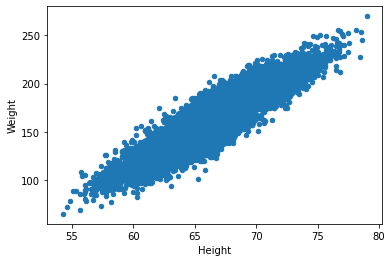

In [13]:
data.plot(kind='scatter', x = 'Height', y='Weight')

plt.show()


<AxesSubplot:ylabel='Frequency'>

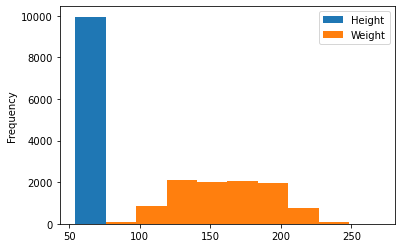

In [14]:
data.plot(kind='hist')

In [15]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [17]:
!pip install seaborn

In [18]:
import seaborn as sns

In [19]:
corr_m = data.corr()

<AxesSubplot:>

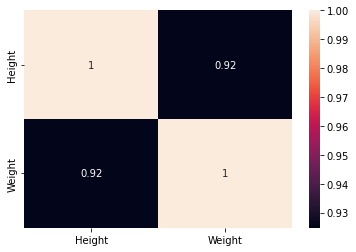

In [23]:
sns.heatmap(corr_m, annot = True)

In [24]:
height = pd.DataFrame(data['Height'])
weight = pd.DataFrame(data['Weight'])

In [25]:
height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


### Building & training linear model

In [26]:
linear_model = linear_model.LinearRegression()

In [27]:
model = linear_model.fit(height, weight)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [28]:
model.coef_

array([[7.71728764]])

In [29]:
model.intercept_

array([-350.73719181])

In [30]:
model.score(height, weight)

0.8551742120609958

### Using model to make predictions & visualizing results

In [33]:
X = ([67, 78, 94])
X = pd.DataFrame(X)
y = model.predict(X)
y = pd.DataFrame(y)
df = pd.concat([X,y], axis = 1, keys=['Height_new', 'Weight_pred'])

df

,Height_new,Weight_pred
,0,0
0,67,166.321080
1,78,251.211244
2,94,374.687846


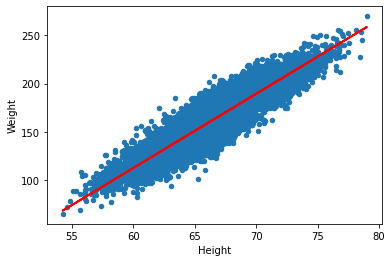

In [59]:
data.plot(kind = 'scatter', x = 'Height', y='Weight')
plt.plot(height, model.predict(height), color = 'red', linewidth =2)